In [1]:
import os
os.getcwd()

'/content'

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
## Upload the zip file

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [ ]:
## Extarct the zip file

In [5]:
# Extract the Zip file
from zipfile import ZipFile
file_path = 'data.zip'
with ZipFile(file_path, 'r') as z:
    z.extractall()

In [ ]:
## Generating Train data and validation data

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# generate train data from google drive using ImageDatagenerator
im_generator = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2,
                                  horizontal_flip=True
                                  )
# import the data
train_data = im_generator.flow_from_directory('./data/training_data/',
                                                   class_mode='categorical',
                                                   target_size=(224,224),
                                                   shuffle=True,
                                                   batch_size=32,
                                                   subset='training')
val_data = im_generator.flow_from_directory('./data/testing_data/',
                                                   class_mode='categorical',
                                                   target_size=(224,224),
                                                   shuffle=True,
                                                   batch_size=32,
                                                   subset='validation')

Found 16524 images belonging to 37 classes.
Found 180 images belonging to 36 classes.


In [ ]:
## Different classes or categories in the training data.

In [7]:
# lets Check for the different classes
category = list(train_data.class_indices.keys())
train_data.class_indices

{'.ipynb_checkpoints': 0,
 '0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10,
 'A': 11,
 'B': 12,
 'C': 13,
 'D': 14,
 'E': 15,
 'F': 16,
 'G': 17,
 'H': 18,
 'I': 19,
 'J': 20,
 'K': 21,
 'L': 22,
 'M': 23,
 'N': 24,
 'O': 25,
 'P': 26,
 'Q': 27,
 'R': 28,
 'S': 29,
 'T': 30,
 'U': 31,
 'V': 32,
 'W': 33,
 'X': 34,
 'Y': 35,
 'Z': 36}

In [ ]:
## Visulaizing the first image from each of the first 16 batches of training data

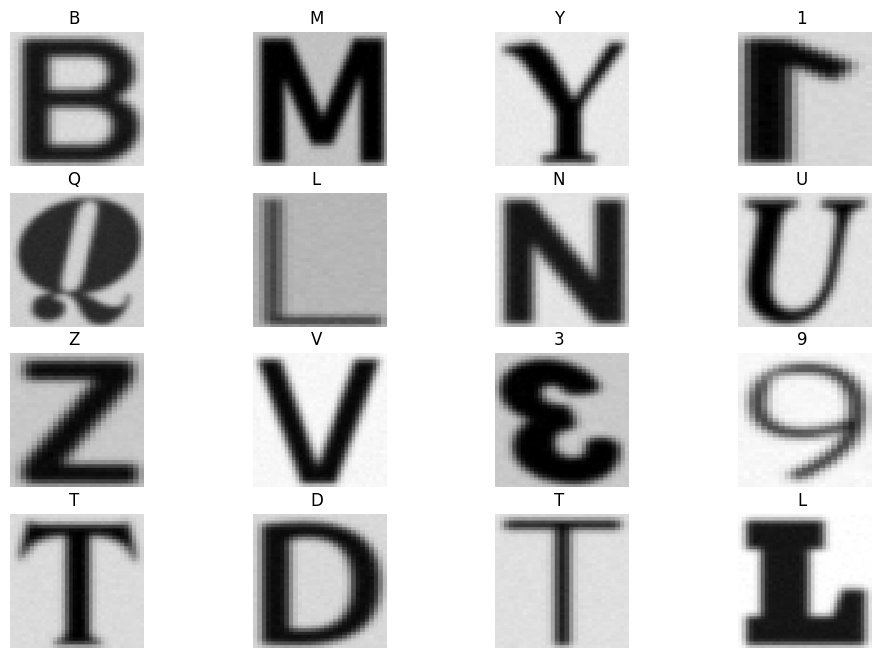

In [8]:
# lets see first image in Evary batch upto 16 batches.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,8))
for i in range(0,16) :
    ax = plt.subplot(4,4,i+1)
    plt.imshow(train_data[i][0][0])
    plt.title(f"{category[np.argmax(train_data[i][1][0])]} ")
    ax.axis("off")

In [ ]:
## Creating a dataframe to store path of the images and their correspoding labels from directory containg training data

In [9]:
import pandas as pd
import os

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Specify the directory containing the training data
datadir = './data/training_data/'

# Loop through each category to collect image paths and labels
for category in os.listdir(datadir):
    category_path = os.path.join(datadir, category)
    if os.path.isdir(category_path):
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            image_paths.append(img_path)
            labels.append(category)

# Create a DataFrame using the collected data
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Display the first few rows of the DataFrame
print(df.head())


                         image_path label
0  ./data/training_data/7/15847.png     7
1   ./data/training_data/7/9115.png     7
2  ./data/training_data/7/18331.png     7
3  ./data/training_data/7/13615.png     7
4   ./data/training_data/7/1267.png     7


In [ ]:
## Visualize the distibution of the labels.

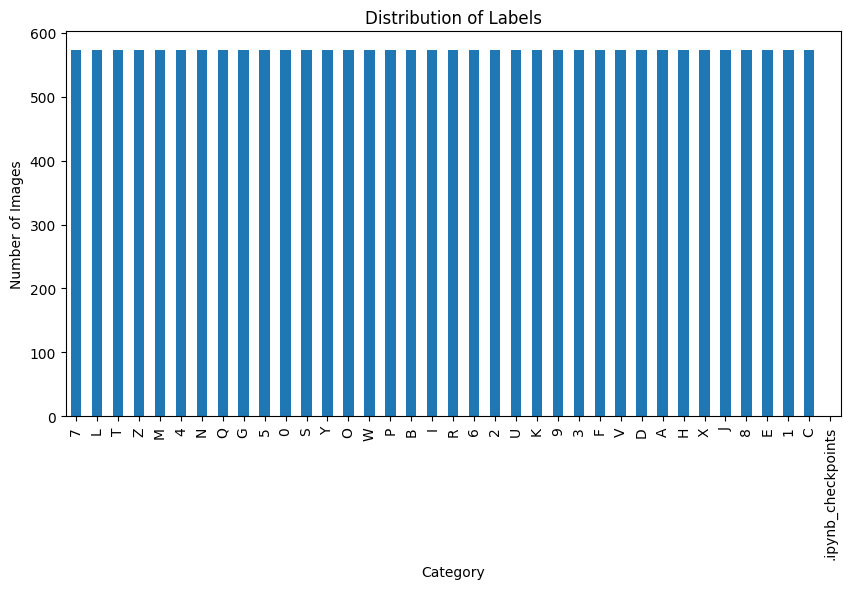

In [10]:
import matplotlib.pyplot as plt

# Count the number of images in each category
label_counts = df['label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
## Visualize the sample of images from the dataset along with their labels.

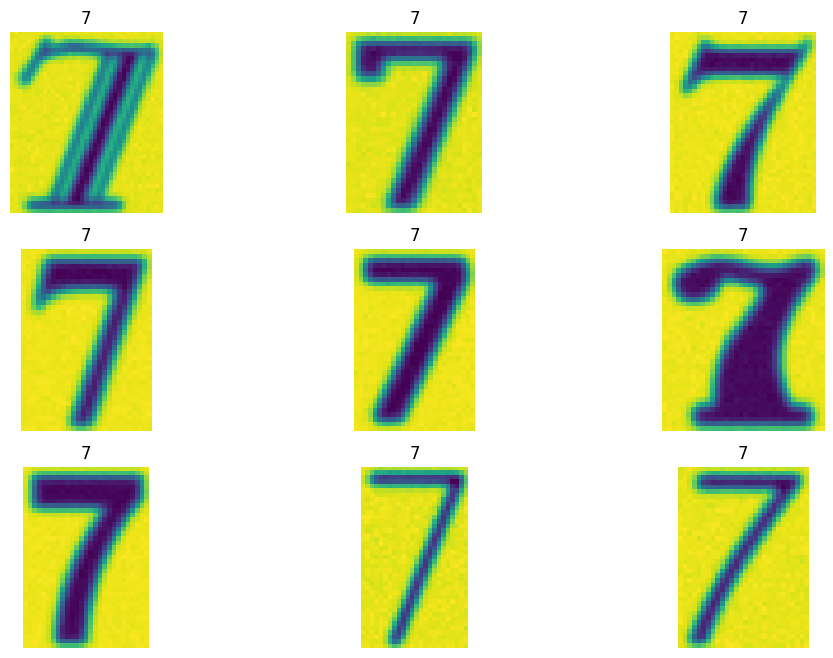

In [11]:
from skimage.io import imread

# Number of sample images to display
num_samples = 9

# Plot sample images
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    ax = plt.subplot(3, 3, i + 1)
    img = imread(df['image_path'][i])
    plt.imshow(img)
    plt.title(df['label'][i])
    plt.axis('off')

plt.show()


In [12]:
## Representing the different image shapes (height, width) and its count in the dataset.

from collections import Counter
from skimage.io import imread
import os

# Get image shapes, filtering for valid image extensions
image_shapes = []
for img_path in df['image_path']:
    ext = os.path.splitext(img_path)[-1].lower()  # Get file extension
    if ext in {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}:  # Check if it's a common image extension
        image_shapes.append(imread(img_path).shape)

# Count the unique shapes
shape_counts = Counter(image_shapes)

# Display the most common shapes
print(shape_counts.most_common())

[((39, 29), 254), ((39, 28), 251), ((39, 27), 241), ((38, 26), 231), ((39, 30), 231), ((38, 28), 214), ((38, 29), 214), ((38, 27), 209), ((39, 32), 206), ((39, 26), 196), ((38, 30), 192), ((38, 25), 183), ((40, 28), 182), ((39, 31), 181), ((39, 33), 178), ((40, 29), 177), ((35, 26), 174), ((38, 31), 171), ((39, 34), 167), ((40, 27), 162), ((40, 30), 158), ((38, 32), 154), ((36, 29), 152), ((38, 33), 150), ((38, 23), 149), ((40, 31), 149), ((38, 24), 147), ((36, 28), 146), ((36, 30), 145), ((36, 27), 143), ((36, 25), 141), ((35, 27), 141), ((39, 25), 138), ((35, 28), 137), ((39, 35), 133), ((36, 26), 130), ((40, 33), 128), ((41, 28), 128), ((39, 24), 127), ((39, 37), 127), ((41, 30), 123), ((38, 34), 122), ((40, 32), 122), ((41, 29), 117), ((36, 33), 114), ((36, 31), 114), ((41, 32), 113), ((39, 36), 113), ((41, 27), 110), ((38, 35), 109), ((35, 30), 108), ((41, 33), 107), ((39, 23), 107), ((40, 26), 107), ((36, 34), 106), ((35, 29), 104), ((35, 25), 104), ((36, 32), 104), ((37, 29), 10

In [ ]:
## Mean and standard deviation of the images

In [13]:
import numpy as np

# Calculate mean and standard deviation of image dimensions
heights = [shape[0] for shape in image_shapes]
widths = [shape[1] for shape in image_shapes]

mean_height = np.mean(heights)
mean_width = np.mean(widths)
std_height = np.std(heights)
std_width = np.std(widths)

print(f'Average image height: {mean_height:.2f} ± {std_height:.2f}')
print(f'Average image width: {mean_width:.2f} ± {std_width:.2f}')


Average image height: 38.43 ± 3.40
Average image width: 30.84 ± 8.21


In [ ]:
## Dataset Overview and Statistics
## Character distribution Analysis

                         image_path label
0  ./data/training_data/7/15847.png     7
1   ./data/training_data/7/9115.png     7
2  ./data/training_data/7/18331.png     7
3  ./data/training_data/7/13615.png     7
4   ./data/training_data/7/1267.png     7
Total number of images in the dataset: 20629

Number of images per class:
label
7                     573
L                     573
T                     573
Z                     573
M                     573
4                     573
N                     573
Q                     573
G                     573
5                     573
0                     573
S                     573
Y                     573
O                     573
W                     573
P                     573
B                     573
I                     573
R                     573
6                     573
2                     573
U                     573
K                     573
9                     573
3                     573
F                 

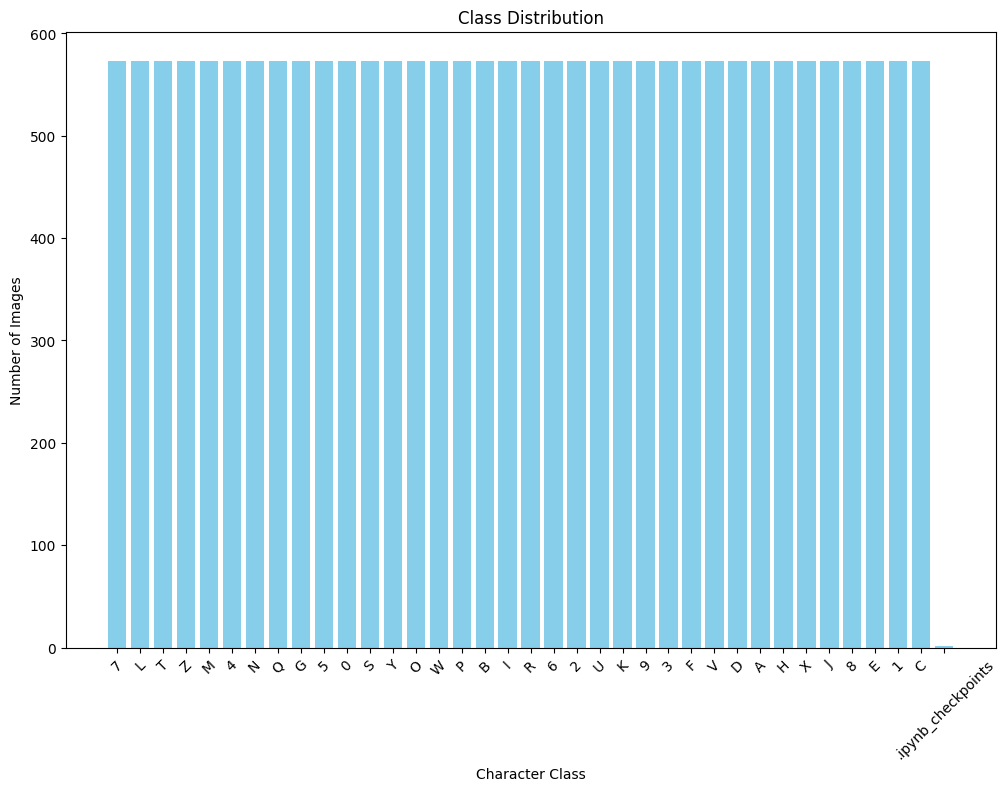

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Path to your OCR dataset
dataset_path = './data/training_data/'  # Update this to your dataset path

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Loop through each directory (class) in the dataset
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            image_paths.append(img_path)
            labels.append(class_name)

# Create a DataFrame to store image paths and labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Display the first few rows of the DataFrame
print(df.head())

# Calculate the total number of images in the dataset
total_images = len(df)
print(f"Total number of images in the dataset: {total_images}")

# Count the number of images per class
class_counts = df['label'].value_counts()

# Display the number of images per class
print("\nNumber of images per class:")
print(class_counts)

# Plot the distribution of classes
plt.figure(figsize=(12, 8))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Character Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [15]:
## Train_Test_Split

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example: Loading image paths and labels
x = df['image_path']
y = df['label']
# Split data into training and testing sets
xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Now, train_paths and train_labels contain the training data,
# while test_paths and test_labels contain the testing data.


In [17]:
# ANN - Artificial neural netwroks

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Load train data from directory
train_data = im_generator.flow_from_directory('./data/training_data/',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')

# Load validation data from directory
val_data = im_generator.flow_from_directory('./data/training_data/',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation')



Found 16524 images belonging to 37 classes.
Found 4104 images belonging to 37 classes.


In [ ]:
## Model building using ANN

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the ANN model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten the 224x224x3 images to a 1D vector
    Dense(128, activation='relu'),       # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),        # Second hidden layer with 64 neurons and ReLU activation
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer with softmax activation
])

# Compile the model using SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the generator
model.fit(train_data,
          epochs=10,
          validation_data=val_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print('\nValidation accuracy:', test_acc)

Epoch 1/10
517/517 [==============================] - 31s 57ms/step - loss: 3.5712 - accuracy: 0.0467 - val_loss: 3.3350 - val_accuracy: 0.0482
Epoch 2/10
517/517 [==============================] - 29s 55ms/step - loss: 3.2942 - accuracy: 0.0566 - val_loss: 3.0685 - val_accuracy: 0.1228
Epoch 3/10
517/517 [==============================] - 27s 51ms/step - loss: 2.9999 - accuracy: 0.1138 - val_loss: 2.8729 - val_accuracy: 0.1577
Epoch 4/10
517/517 [==============================] - 28s 54ms/step - loss: 2.8603 - accuracy: 0.1428 - val_loss: 2.7507 - val_accuracy: 0.1296
Epoch 5/10
517/517 [==============================] - 26s 51ms/step - loss: 2.7518 - accuracy: 0.1572 - val_loss: 2.6769 - val_accuracy: 0.1613
Epoch 6/10
517/517 [==============================] - 29s 55ms/step - loss: 2.6684 - accuracy: 0.1661 - val_loss: 2.5816 - val_accuracy: 0.1837
Epoch 7/10
517/517 [==============================] - 28s 54ms/step - loss: 2.6181 - accuracy: 0.1788 - val_loss: 2.5851 - val_accuracy:

In [20]:
## Using Adam optimizer and changing the learning rate

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the ANN model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten the 224x224x3 images to a 1D vector
    Dense(128, activation='relu'),       # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),        # Second hidden layer with 64 neurons and ReLU activation
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer with softmax activation
])

# Compile the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the generator
model.fit(train_data,
          epochs=10,
          validation_data=val_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print('\nValidation accuracy:', test_acc)

Epoch 1/10
517/517 [==============================] - 28s 52ms/step - loss: 5.1308 - accuracy: 0.1409 - val_loss: 2.3750 - val_accuracy: 0.3194
Epoch 2/10
517/517 [==============================] - 28s 55ms/step - loss: 2.1869 - accuracy: 0.3606 - val_loss: 2.0040 - val_accuracy: 0.4040
Epoch 3/10
517/517 [==============================] - 28s 55ms/step - loss: 1.6426 - accuracy: 0.5208 - val_loss: 1.6677 - val_accuracy: 0.5273
Epoch 4/10
517/517 [==============================] - 27s 53ms/step - loss: 1.3274 - accuracy: 0.6163 - val_loss: 1.0811 - val_accuracy: 0.6937
Epoch 5/10
517/517 [==============================] - 27s 53ms/step - loss: 1.0667 - accuracy: 0.6942 - val_loss: 0.9725 - val_accuracy: 0.7230
Epoch 6/10
517/517 [==============================] - 29s 56ms/step - loss: 0.9011 - accuracy: 0.7403 - val_loss: 0.7496 - val_accuracy: 0.7749
Epoch 7/10
517/517 [==============================] - 27s 52ms/step - loss: 0.8541 - accuracy: 0.7487 - val_loss: 0.8086 - val_accuracy:

In [21]:
## Using sigmoid activation function.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the ANN model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten the 224x224x3 images to a 1D vector
    Dense(128, activation='sigmoid'),       # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='sigmoid'),        # Second hidden layer with 64 neurons and ReLU activation
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer with softmax activation
])

# Compile the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the generator
model.fit(train_data,
          epochs=10,
          validation_data=val_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print('\nValidation accuracy:', test_acc)

Epoch 1/10
517/517 [==============================] - 28s 53ms/step - loss: 3.5995 - accuracy: 0.0271 - val_loss: 3.5909 - val_accuracy: 0.0278
Epoch 2/10
517/517 [==============================] - 27s 53ms/step - loss: 3.5913 - accuracy: 0.0268 - val_loss: 3.5879 - val_accuracy: 0.0278
Epoch 3/10
517/517 [==============================] - 32s 63ms/step - loss: 3.5899 - accuracy: 0.0257 - val_loss: 3.5875 - val_accuracy: 0.0278
Epoch 4/10
517/517 [==============================] - 29s 57ms/step - loss: 3.5884 - accuracy: 0.0266 - val_loss: 3.5862 - val_accuracy: 0.0278
Epoch 5/10
517/517 [==============================] - 28s 54ms/step - loss: 3.5873 - accuracy: 0.0267 - val_loss: 3.5863 - val_accuracy: 0.0278
Epoch 6/10
517/517 [==============================] - 27s 52ms/step - loss: 3.5871 - accuracy: 0.0261 - val_loss: 3.5854 - val_accuracy: 0.0278
Epoch 7/10
517/517 [==============================] - 28s 54ms/step - loss: 3.5865 - accuracy: 0.0263 - val_loss: 3.5851 - val_accuracy:

In [22]:
## Evaluation: Using ANN and  Adam optimizer and changing the learning rate we got the accuracy of 80%.